# Exercicios sklearn

In [19]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Importação do DataFrame "Drugs"

In [3]:
df_drogas = pd.read_csv('./SRC/drogas.csv')
df_drogas.columns = ['IDADE', 'SEXO','PRESSAO_SANGUE', 'COLESTEROL', 'SODIO_POTACIO', 'DROGA']

In [4]:
df_drogas['DROGA'].count()

200

### Transformação dos dados categoricos em numéricos

In [5]:

labelencoder = LabelEncoder()

df_drogas['SEXO'] = labelencoder.fit_transform(df_drogas['SEXO'])
df_drogas['PRESSAO_SANGUE'] = labelencoder.fit_transform(df_drogas['PRESSAO_SANGUE'])
df_drogas['COLESTEROL'] = labelencoder.fit_transform(df_drogas['COLESTEROL'])
df_drogas['DROGA'] = labelencoder.fit_transform(df_drogas['DROGA'])


## Funções

In [20]:
def separacao_test_split(df, df_column, test_size):
    X_train, X_test, y_train, y_test = train_test_split(df, df_column, test_size=test_size, random_state=42)
    return (X_train, X_test, y_train, y_test)

def separacao_KFold(X, y, n):
     kf = KFold(n_splits=n)
     media = []

     for i, j in kf.split(X):
          X_train, X_test = X.values[i], X.values[j] 
          y_train, y_test = y[i], y[j]
          
          modelo = KNN(X_train, y_train, 3)
          y_predict = modelo.predict(X_test)
          media.append(accuracy_score(y_test, y_predict))

     return(sum(media)/len(media))

def KNN(X_train, y_train, n):
    modelo = KNeighborsClassifier(n_neighbors=n)
    return modelo.fit(X_train, y_train)

def decision_tree(X_train, y_train):
    modelo = DecisionTreeClassifier()
    return modelo.fit(X_train, y_train)

def random_forest(X_train, y_train):
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    return clf.fit(X_train, y_train)

def print_matriz_confusao(y_test, y_predict):
    cm = confusion_matrix(y_test, y_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()


## Separando dados utilizando método K-fold

In [7]:
X = df_drogas.drop(columns=['DROGA'])
y = df_drogas['DROGA']

## Testando as funções

In [8]:
X_train, X_test, y_train, y_test = separacao_test_split(X, y, 0.25)

In [9]:
modelo = KNN(X_train, y_train, 3)
y_predict = modelo.predict(X_test)

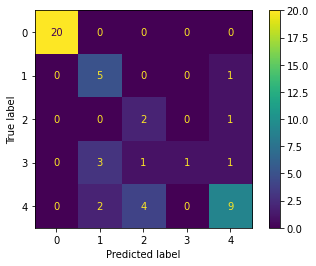

In [10]:
print_matriz_confusao(y_test, y_predict)

Gráfico de K-Vizinhos x Precisão

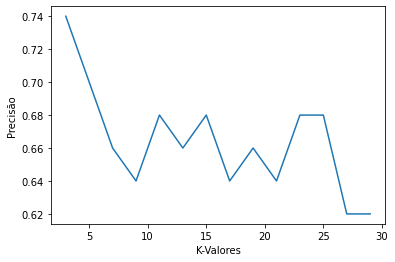

In [11]:
k = []
precisao = []
for i in range(3,30,2):
    modelo = KNN(X_train, y_train, i)
    k.append(i)
    y_predict = modelo.predict(X_test)
    precisao.append(accuracy_score(y_test, y_predict))
fig, ax = plt.subplots()
ax.plot(k, precisao)
ax.set(ylabel='Precisão', xlabel='K-Valores')
plt.show()


Qual melhor tamanho para blocos no K-fold?

In [12]:
maior = 0
tamanho = -1
for i in range(2,25):
    teste = separacao_KFold(X, y, i)
    if teste > maior:
        maior = teste
        tamanho = i


print(f'Melhor valor para tamanho dos blocos é: {tamanho}, com média de precisao {maior}')

Melhor valor para tamanho dos blocos é: 22, com média de precisao 0.7454545454545454


In [13]:
maior = 0
tamanho = -1
decimal = np.arange(0.25,0.4, 0.02)
for i in decimal:
    X_train, X_test, y_train, y_test = separacao_test_split(X, y, i)
    modelo = KNN(X_train,y_train, 3)
    precisao = accuracy_score(y_test, modelo.predict(X_test))
    if precisao > maior:
        maior = precisao
        tamanho = i


print(f'Melhor valor para tamanho dos testes é: {tamanho}, com média de precisao de {maior}')



Melhor valor para tamanho dos testes é: 0.25, com média de precisao de 0.74


## Arvore de decisão

In [17]:
modelo = decision_tree(X_train, y_train)
y_predict = modelo.predict(X_test)

In [18]:
print(accuracy_score(y_test,y_predict))

1.0


In [22]:
modelo = random_forest(X_train, y_train)
y_predict = modelo.predict(X_test)

In [23]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         6
           4       0.80      1.00      0.89        24

    accuracy                           0.92        79
   macro avg       0.76      0.80      0.78        79
weighted avg       0.86      0.92      0.89        79



/home/geovane/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/geovane/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/geovane/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
